In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("D:\ExcelR Data Science\Assignments\Clustering\crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.rename(columns={'Unnamed: 0':'Place'},inplace=True)

In [4]:
df.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
df.shape

(50, 5)

In [7]:
#df.iloc[:,1:5]

In [8]:
#Data standard Normalization

from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
df_std=sd.fit_transform(df.iloc[:,1:5])


In [9]:
#df_std=pd.DataFram`e(df_std)

In [10]:
df_std

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

### Hierarchical Clustering

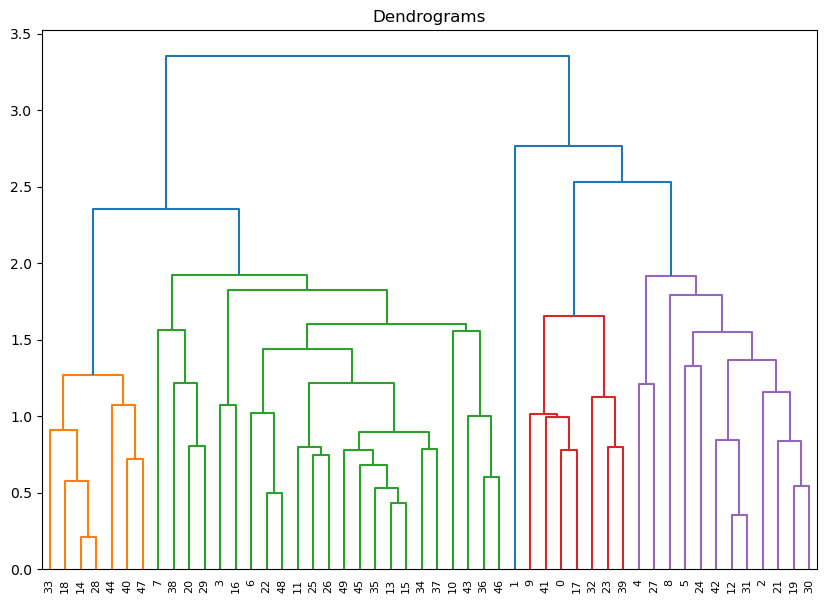

In [11]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_std, method='average'))

In [12]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_hc=cluster.fit_predict(df_std)
labels=cluster.labels_

In [13]:
labels

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

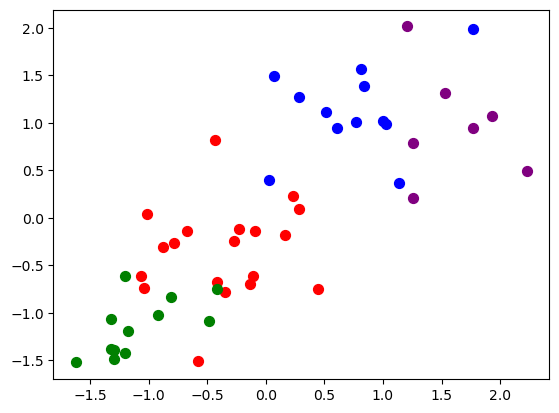

In [14]:
plt.scatter(df_std[labels==0, 0], df_std[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(df_std[labels==1, 0], df_std[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(df_std[labels==2, 0], df_std[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(df_std[labels==3, 0], df_std[labels==3, 1], s=50, marker='o', color='purple')
plt.show()

In [15]:
df['h_clusterid']=cluster.labels_

In [16]:
df

,Place,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


### KMeans Clustering 

In [17]:
df1=pd.read_csv("D:\ExcelR Data Science\Assignments\Clustering\crime_data.csv")
df1.rename(columns={'Unnamed: 0':'Place'},inplace=True)
df1.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


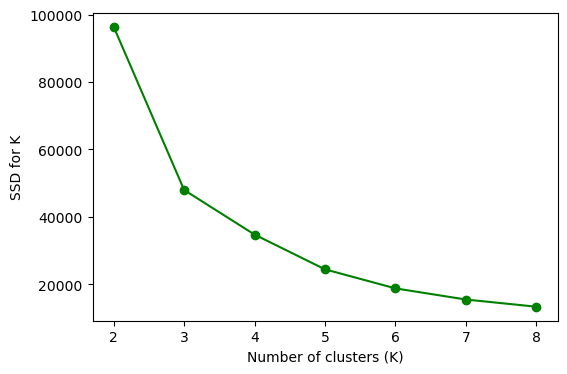

In [18]:
from sklearn.cluster import KMeans
# 
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df1.iloc[:,1:5])
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

In [19]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3,max_iter=600, algorithm = 'auto')
cluster = kmeans_model.fit_predict(df1.iloc[:,1:5])


In [20]:
cluster

array([1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 0])

In [21]:
df1['Cluster']=cluster

In [22]:
df1

,Place,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,0


### DBSCAN Clustering

In [23]:
df2=pd.read_csv("D:\ExcelR Data Science\Assignments\Clustering\crime_data.csv")
df2.rename(columns={'Unnamed: 0':'Place'},inplace=True)
df2.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [24]:
# Finding the optimum value of eps 

from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 4).fit(df2.iloc[:,1:5])
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df2.iloc[:,1:5])
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

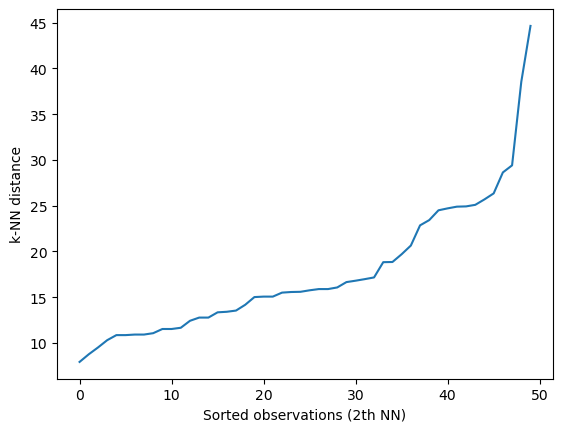

In [25]:
k_dist = sort_neigh_dist[:, 2]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (2th NN)")
plt.show()

In [26]:

from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

24.495101551126503


In [27]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 24, min_samples = 4).fit(df2.iloc[:,1:5])
# get cluster labels
clusters.labels_

array([ 2, -1,  0,  3,  0, -1,  1,  2, -1,  3,  1,  1,  2,  1,  1,  1,  1,
        2,  1,  0,  3,  2,  1, -1,  3,  1,  1,  2,  1,  3,  0,  2, -1,  1,
        1,  3,  3,  1,  3, -1,  1,  3, -1,  1,  1,  3,  3,  1,  1,  3],
      dtype=int64)

In [28]:
df2['Cluster']=clusters.labels_

In [29]:
df2

,Place,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,3
